In [12]:
function f(x)
    a = 0
    for i in x
        a+=i^2
    end
    return a
end

f (generic function with 1 method)

In [13]:
all_perm(x, n) = Iterators.product([x for i = 1:n]...)

all_perm (generic function with 1 method)

In [14]:
function Flatt(N,d)
    F=0
    for x in all_perm([i/N for i=0:N-1], d), delta in all_perm([i/N for i=0:1], d)
        F+=f(collect(x)+collect(delta)) 
    end
    F/=N^d*2^d
    return F
end

Flatt (generic function with 1 method)

In [15]:
function Fmc(N,d)
    F=0
    for ix=1:N^d
        x=[rand() for i=1:d]
        F+=f(x)
    end
    F/=N^d
    return F
end

Fmc (generic function with 1 method)

In [16]:
using Plots

In [17]:
Ns=[N for N in 1:20]

20-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

In [19]:
d=5
deltalatt = [(abs(Flatt(N,d)-d/3)/(d/3)) for N in Ns]

20-element Vector{Float64}:
 0.49999999999999994
 0.12499999999999994
 0.05555555555555633
 0.031249999999999955
 0.019999999999938376
 0.013888888888612304
 0.01020408163269737
 0.007812499999999955
 0.00617283950625298
 0.0049999999999187136
 0.004132231403681974
 0.0034722222222127283
 0.0029585798822679976
 0.002551020408250482
 0.0022222222213104546
 0.0019531249999999555
 0.0017301038073743056
 0.0015432098789192937
 0.0013850415582130182
 0.0012499999994017407

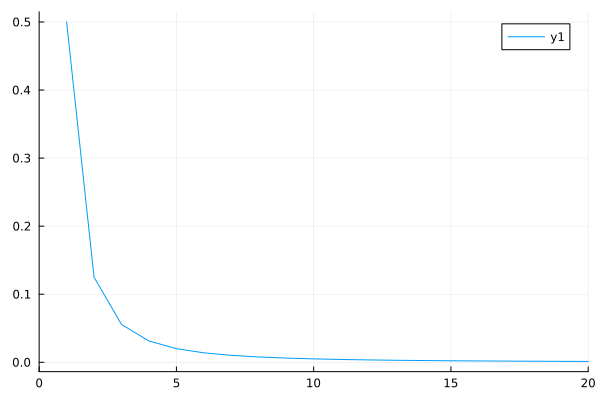

In [20]:
plot(Ns,deltalatt,xlim=(0,20))

In [21]:
d=5
Ns=[N for N in 1:20]
deltamc=[(Fmc(N,d)-d/3)/(d/3) for N in Ns]

20-element Vector{Float64}:
 -0.1874810192057859
  0.01709410772468085
 -0.020818120629506075
  0.010939458971077797
 -0.004682546778045404
 -0.001233083923193412
 -0.00465471053824702
  0.005517220034974013
  0.0018121616118368599
  0.0002470974421883376
  0.0004681315392284446
 -0.0005904986416053415
 -1.6793812563120623e-5
  0.0009029448747161161
 -0.00014261350801825223
  0.0006764013802137647
  0.00020261509854848647
 -2.7373488510962216e-5
 -9.59922197929508e-6
 -0.00016843214617328072

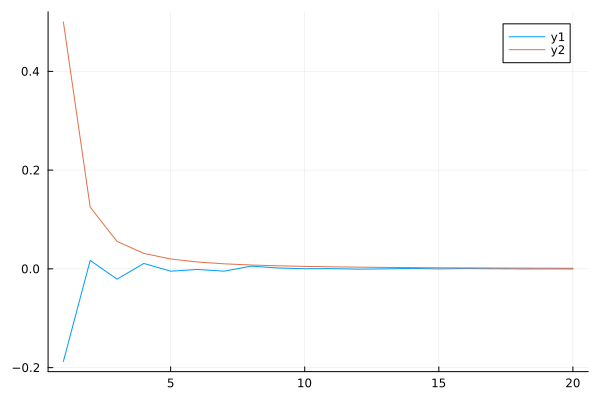

In [22]:
plot(Ns,deltamc)
plot!(Ns,deltalatt)

In [25]:
function sigma(N,M,d)
    F2=0
    F1=0
    for iM=1:M
        F=Fmc(N,d)
        F2+=F^2
        F1+=F
    end
    F2/=M
    F1/=M
    return sqrt(F2-F1^2)
end

sigma (generic function with 2 methods)

In [27]:
Nmcs = [i for i in 1:20]
sigmas = [sigma(i,100,d) for i in Nmcs]

20-element Vector{Float64}:
 0.6267281457236481
 0.11078125342829674
 0.03942078763055238
 0.018789813367841707
 0.013641546020196543
 0.00792655571672434
 0.0046972987593495875
 0.0036063648301342933
 0.0024494529524660543
 0.0022226468168933394
 0.0014140021387428476
 0.0013436328593603314
 0.0011455016388308096
 0.0009007501507485111
 0.0008796087795188328
 0.0007221232260615737
 0.0006114705017136365
 0.0005218459508681088
 0.0004699446264466884
 0.0003545045463821879

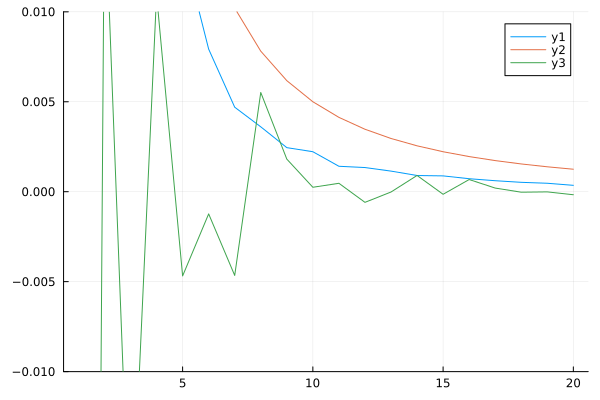

In [30]:
plot(Nmcs,sigmas,ylim=(-0.01,0.01))
plot!(Ns,deltalatt,ylim=(-0.01,0.01))
plot!(Ns,deltamc,ylim=(-0.01,0.01))